In [1]:
import math as m
import numpy as np
import random as rnd
import re
import itertools as it
import pandas as pd
import matplotlib.pyplot as plt
from scipy.special import factorial2
from scipy.special import factorial
from scipy.special import binom
import scipy.stats as sps
%matplotlib inline

# 5.1

We have discussed how a Binomial random variable can be thought of as a sum of Bernoulli random variables. Using MGFs, prove that if X∼Bin(n,p), then X is the sum of n independent Bern(p) random variables.

Hint: The Binomial Theorem states that $\sum_{k = 0}^n {n \choose k} x^k y^{n - k} = (x + y)^n$.

### 5.1 Analytical Solution

Let's start off with the Bernoulli MGF, this is the $E(e^t)$:

### $\sum_{x = 0}^1 e^{tx}p^x(1-p)^{1-x} = (1-p) + pe^t$  

Multiplying this MGF repeatedly by itself will give us the MGF for the sum of many i.i.d. Bernoulli RVs:  

### $MGF(B_1 + B_2 + ... +B_n) = ((1-p) + pe^t)^n$

Now, let's move on to the Binomial MGF:  

### $\sum_{x = 0}^n {n \choose x} e^{tx} p^x (1-p)^{n - x} = \sum_{x = 0}^n {n \choose x} (pe^t)^x (1-p)^{n - x} = ((1-p) + pe^t)^n$

The sum of i.i.d. Bernoulli RVs has a Binomial distribution since the MGFs are the same. The last step for the Binomial piece of the proof comes from the Binomial Theorem hint above. We just grouped $p$ and $e^t$ as a common variable raised to $x$ to apply the theorem.

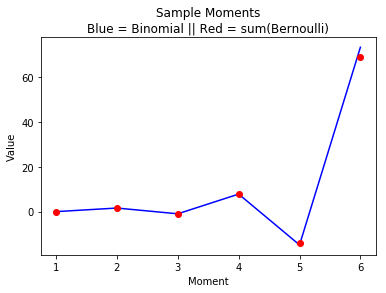

In [2]:
# Shared parameters across distributions
p = 0.8
n = 10
size = 100000
max_moment = 6

# Generate many Binomial numbers
bin_samp = np.random.binomial(n = n, p = p, size = size)

# Generate many Bernoulli numbers
bern_samp = np.random.choice([0,1], size = (size,n), replace = True, p = [1-p,p])

bern_samp = np.sum(bern_samp, axis = 1)

#

comp = pd.DataFrame({
    'Moment': np.arange(1,max_moment+1),
    'BinomSamp': [sps.stats.moment(bin_samp, i) for i in range(1,max_moment+1)],
    'BernSamp': [sps.stats.moment(bern_samp, i) for i in range(1,max_moment+1)]
})

#

_ = plt.plot(comp['Moment'],
             comp['BinomSamp'],
            'b')

_ = plt.plot(comp['Moment'],
             comp['BernSamp'], 
             'ro')

#

_ = plt.title('Sample Moments\nBlue = Binomial || Red = sum(Bernoulli)')

_ = plt.ylabel('Value')
_ = plt.xlabel('Moment')

# 5.2

a. Ulysses has been studying the Uniform distribution and he makes the following claim. ‘Let X∼Unif(0,10) and Y1,Y2,...,Y10 be i.i.d. Unif(0,1). The sum of the Y random variables $\sum_{k = 1}^{10} Y_k$ has the same distribution as X; this is intuitive, adding up 10 random draws from 0 to 1 is the same as generating one random draw from 0 to 10.’ Test Ulysses’ claim using MGFs.

b. Defend your answer to (a.) using intuition.

### 5.2 Analytical Solution

a. Let's compare the MGFs to see if this holds up. The MGF of X looks like:  

### $E(e^{tX}) = \int_0^{10} \frac{e^{tx}}{10} dx = \frac{e^{tx}}{10t} |_0^{10} = \frac{e^{10 t} - 1}{10t}$

Next, we can compute the MGF of Y. In order to get the MGF of the sum of the random variables, we just multiply the individual MGFs.  

### $M_y(t) = \int_0^1 e^{ty} dy = \frac{e^{ty}}{t} |_0^1 = \frac{e^t - 1}{t}$  

Which means the full MGF for Y looks like:  

### $(\frac{e^t - 1}{t})^{10}$  

These MGFs are clearly different, X does not have the same distribution as Y:

### $\big(\frac{e^t - 1}{t}\big)^{10} \neq \frac{e^{10 t} - 1}{10t}$  

b. A uniform distribution assumes equal probability for all equal sized slices of the support. For example, P(X between 0 and 0.10) = P(X between 0.5 and 0.6), both of these have length 0.10.  

The story changes for the sum of many uniforms. In this case, if we want P(X between 0 and 0.10) this creates the constraint that no single value going into the sum can be $\geq$ 0.10 and that most of the values need to be quite small. This constraint lowers the effective probability of observing such an event.

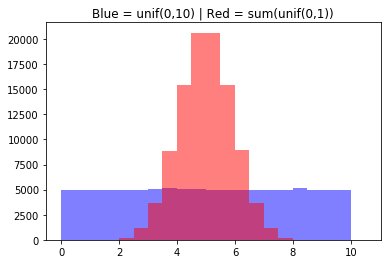

In [3]:
# Setting up random values
size = 100000

unif_rand = np.random.uniform(0,10, size)

sum_unif_rand = np.random.uniform(0,1,(10,size))

sum_unif_rand = np.sum(sum_unif_rand, axis = 0)

#

plt.hist(unif_rand, bins = np.arange(0,11,0.5), color = 'blue', alpha = 0.5)
plt.hist(sum_unif_rand, bins = np.arange(0,11,0.5), color = 'red', alpha = 0.5)

plt.title("Blue = unif(0,10) | Red = sum(unif(0,1))")
plt.show()

# 5.3

Let X be a degenerate random variable such that X=c always, where c is a constant. Find the MGF of X, and use the MGF to find the expectation, variance and all moments of X. Explain why these results make sense.

### 5.3 Analytical Solution

Since there's no PMF/PDF for $c$, we can just pump it into the expectation that defines MGFs:  

### $M_x(t) = E(e^{tx}) = e^{tc}$  

Next, we can use Property 5.3 and take the $n^{th}$ derivative of the Taylor Series evaluated at zero to get a specific moment. Let's try this with the mean:  

### $E(X) = M_x^{\prime}(0) = ce^{0 \cdot c} = c$  

For each derivative, we will factor out a single $c$ from the exponential, giving us the general form:  

### $E(X^k) = c^k e^{0 \cdot c} = c^k$  

Using this, we can see that the Variance is $E(c^2) - E(c)^2 = 0$. This makes sense since the random variable never actually varies.

# 5.4

Let $X∼N(μ,σ^2)$. The MGF of X is given by $M_x(t) = exp(μt+\frac{1}{2}σ^2t^2)$ (in general, you can find this and other useful facts about distributions on [Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution)). Using this fact, as well as properties of MGFs, show that the sum of independent Normal random variables has a Normal distribution.

### 5.4 Analytical Solution

To get the moments of the sum of two random variables, we simply multiply the MGFs. Let's try this with two distinct normals:  

### $M_{x_1}(t) = exp(μ_{x_1}t+\frac{1}{2}σ_{x_1}^2t^2) \text{ and } M_{x_2}(t) = exp(μ_{x_2}t+\frac{1}{2}σ_{x_2}^2t^2)$  

## $exp(μ_{x_1}t+\frac{1}{2}σ_{x_1}^2t^2) \cdot exp(μ_{x_2}t+\frac{1}{2}σ_{x_2}^2t^2) = exp((μ_{x_1}+μ_{x_2})t + \frac{1}{2}(σ_{x_1}^2+σ_{x_2}^2)t^2)$  

This looks exactly like the MGF for a Normal distribution with mean $(μ_{x_1}+μ_{x_2})$ and variance $(σ_{x_1}^2+σ_{x_2}^2)$. A key thing to remember here is that for this result to work, the distributions need to be *independent*.

Actual Mean: 1.72 || Analytical Mean: 1.72
Actual Var: 13.47 || Analytical Var: 13.49


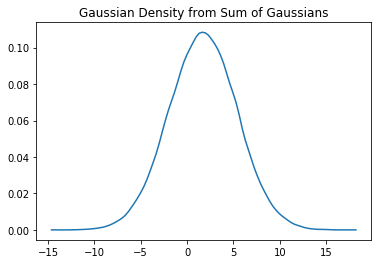

In [4]:
samps = 100000

norm_sum = np.random.normal(0,1,samps) + np.random.normal(np.exp(1),np.pi,samps) + np.random.normal(-1,(1 + 5**0.5)/2,samps)

print('Actual Mean: %.2f || Analytical Mean: %.2f' % (np.mean(norm_sum), np.exp(1) - 1))
print('Actual Var: %.2f || Analytical Var: %.2f' % (np.var(norm_sum), 1 + np.pi**2 + ((1 + 5**0.5)/2)**2))

kde = sps.gaussian_kde(norm_sum)

dist_space = np.linspace(min(norm_sum), max(norm_sum), 100)

plt.plot(dist_space, kde(dist_space))

plt.title("Gaussian Density from Sum of Gaussians")
plt.show()

# 5.5

Let X ∼ Expo(λ) and Y = X+c for some constant c. Does Y have an Exponential distribution? Use the MGF of Y to answer this question.

### 5.5 Analytical Solution

From problem 5.3 we know that the MGF of a degenerate RV is:  

### $M_x(t) = E(e^{tx}) = e^{tc}$  

Since Y = X + c, we can multiply the two MGFs:  

### $M_y(t) = M_x(t)M_c(t) = \Big(\frac{\lambda}{\lambda - t}\Big) e^{tc} = \frac{\lambda e^{tc}}{\lambda - t}$  

This has a different form than the vanilla Exponential MGF:  

### $ M_x(t) = \Big(\frac{\lambda}{\lambda - t}\Big)$  

Since the MGFs aren't the same, these are two different distributions.